In [11]:
import gym
from gym import spaces

class BlackjackGame(gym.Env):
    def __init__(self):
        self.action_space = spaces.Discrete(2)
    
    def _step(self, action):
        pass

    def _reset(self):
        pass
    
    def _render(self, mode='human', close=False):
        pass

In [23]:
import gym
env = gym.make('Blackjack-v0')
for i_episode in range(1):
    observation = env.reset()
    for t in range(100):
#         env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            print("Reward: {}".format(reward))
            break

(16, 10, True)
(21, 10, True)
Episode finished after 2 timesteps
Reward: 1.0


In [25]:
print(env.observation_space)
print(env.action_space)

Tuple(Discrete(32), Discrete(11), Discrete(2))
Discrete(2)


In [42]:
def greedy(Q, state):
    return np.argmax(Q[state])

def ϵ_greedy(Q, state, ϵ = 0.1):
    return np.random.choice([0,1]) if (np.random.rand() < ϵ) else greedy(Q, state)

def play_optimally(Q):
    state = env.reset()
    done = False
    while(not(done)):
        action = greedy(Q, state)
        state, reward, done, info = env.step(action)
    return reward

In [81]:
import numpy as np

Q = np.zeros((32,11,2,2))
iters = 1
α = 0.1
λ = 1

results = []

ϵ_0 = 0.1
ϵ_end = 0.001
ϵ = ϵ_0

for i in range(iters):
    current_state = env.reset()
    done = False
    while not(done):
        action = ϵ_greedy(Q, current_state, ϵ = ϵ_0)
        next_state, reward, done, info = env.step(action)
    new_estimate = reward + λ * Q[next_state][greedy(Q, next_state)] 
    Q[current_state][action] = (1 - α) * Q[current_state][action] +  α * new_estimate
        
    current_state = next_state
    
#     if i % 10000 == 0:
#         s = 0
#         for j in range(1000):
#             s += play_optimally(Q)
#         results.append(s/1000)
#         print("Iteration {}, ϵ={}, {}".format(i, np.round(ϵ, 4), results[-1]))


/Users/sebastian/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  
/Users/sebastian/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
/Users/sebastian/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future


[[0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


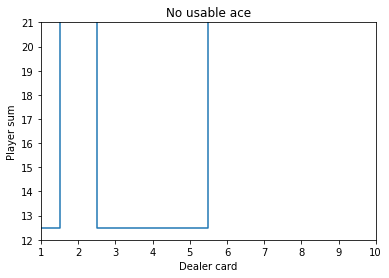

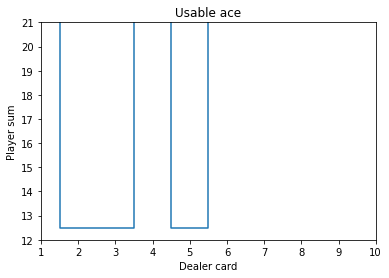

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

dealer_cards = np.arange(10)

def plot_policy(usable_ace, title = ""):
    values = np.argmax(Q[12:22,:,int(usable_ace)], axis=-1)
    print(values)
    min_sticks = np.array([np.argwhere(value > 0)[0]  if (len(np.argwhere(value > 0)) > 0) else 11 for value in values]).reshape(-1)
    plt.step(dealer_cards+1, min_sticks+11.5, where="mid")
    plt.xlabel("Dealer card")
    plt.ylabel("Player sum")
    plt.xlim(1, 10)
    plt.ylim(12,21)
    plt.title(title)
    
plot_policy(0, title="No usable ace")
plt.figure()
plot_policy(1, title="Usable ace")

In [76]:
print(Q[12,:,1])
print(np.argmax(Q[13,:,0], axis=1))

[[   0.            0.        ]
 [   0.85745171   -1.        ]
 [  87.0056501    -0.97496844]
 [  76.46463861   -0.84990536]
 [ 104.14652582   -0.84990536]
 [ 107.61266358   -0.19      ]
 [ 139.13691269   -0.91137062]
 [  75.32368312   -0.79410887]
 [ 121.58656837   -0.98669721]
 [  57.68034131   -0.99978153]
 [  20.84126217   -1.        ]]
[0 0 0 0 0 0 0 0 0 0 0]
